# DO NOT TOUCH!

In [1]:
from models.point_cloud import *
from methods.gad import *

In [2]:
k = 100

In [3]:
n1, n2 = 10000, 10000
r1, r2 = 1, 1
seed1, seed2 = 1, 1

In [4]:
points = sample_from_intersecting_planes(n1, r1, n2, r2, seed1, seed2)

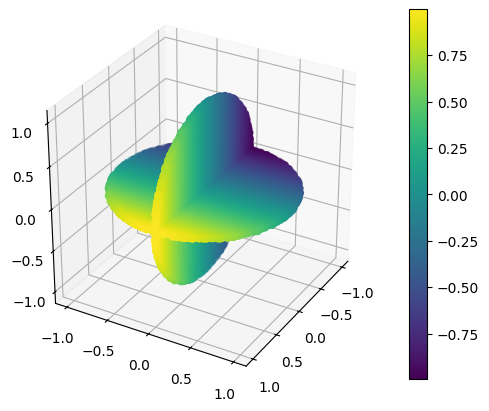

In [5]:
plot_3d_scatterplot(points, points[:, 0], elev=30, azim=30)

In [6]:
point_cloud = PointCloud()
point_cloud.random_constructor(points, len(points), 1)

In [7]:
for query in point_cloud.queries:
    query.intrinsic_dimension = 2.0

In [8]:
detect(point_cloud, k)

In [9]:
queries = [query for query in point_cloud.queries if query.point[0] <= 0]

In [10]:
data = np.array([query.point for query in queries])
c = [query.classification for query in queries]

In [11]:
for i in range(len(c)):
    if c[i] == 'boundary':
        c[i] = 0
    if c[i] == 'regular':
        c[i] = 1
    if c[i] == 'singular':
        c[i] = 2

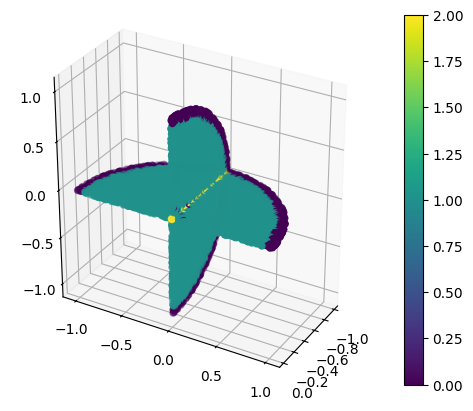

In [12]:
plot_3d_scatterplot(data, c, elev=30, azim=30)

In [13]:
t1 = [query.classification_estimates for query in point_cloud.queries]

In [14]:
detect(point_cloud, k, n_steps=5)

In [15]:
queries = [query for query in point_cloud.queries if query.point[0] <= 0]

In [16]:
data = np.array([query.point for query in queries])
c = [query.classification for query in queries]

In [17]:
for i in range(len(c)):
    if c[i] == 'boundary':
        c[i] = 0
    if c[i] == 'regular':
        c[i] = 1
    if c[i] == 'singular':
        c[i] = 2

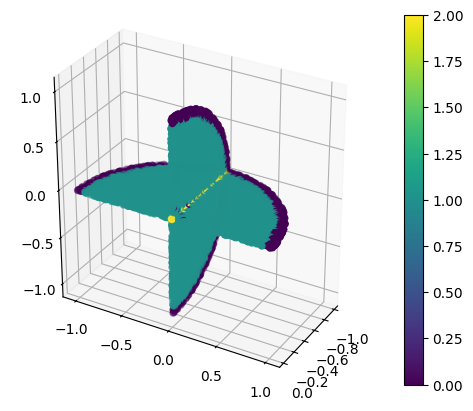

In [18]:
plot_3d_scatterplot(data, c, elev=30, azim=30)

In [19]:
t2 = [query.classification_estimates for query in point_cloud.queries]

In [20]:
t1[0]

{(0.09849805585078329, 0.0689486390955483): 'regular'}

In [21]:
t2[0]

{(0.09849805585078329, 0.0689486390955483): 'regular'}

In [22]:
t1 == t2

True